# バックシフト演算子（Ｂ）の導入

今回の勉強会テーマである「計量時系列分析」の本文では、AR(2)やAR(p)過程の性質について、「～であることが知られている」や「定理としてまとめておく」として、細かい計算を省略している。これらの計算を補うため、本書では用いられていない「バックシフト演算子(B)」を導入して、AR過程を検討していくことにする。

【参考文献】
* 田中孝文「Rによる時系列分析入門」(シーエーピー出版)の15章、16章あたり

【備考】
参考文献の本文内では「バックシフト演算」ではなく「ラグ演算」と呼んでいる。本によっては異なるが、「バックシフト」と呼んだときは"B"、「ラグ演算」と呼んだ時は"L"を用いている模様。この本では「ラグ演算」と呼びながら記号は"B"を使っている。このノートでは、記号に合わせて「バックシフト」と呼ぶことにします。英語では「backshift operator」と呼ばれる。


### 【定義】バックシフト 演算
バックシフト演算子を以下のように定義する。
$$
By_{t} := y_{t-1}
$$

要するに、バックシフト演算子がかかった時系列を1期戻す計算を行う。

### 【命題】バックシフトのべき乗計算
また、上記より以下が導かれる。
$$
B^{n}y_{t} = B^{n-1}By_{t} = B^{n-1}y_{t-1} = \dots = y_{t-n}
$$

### バックシフトを利用したAR(1)表現
AR(1)の定義

$$ y_{t} = c + \phi_{1} y_{t-1} + \epsilon_{t} $$

これをバックシフト演算子を用いて再表現すると、右辺の$y_{t-1}$が$y_{t}$に書き換えることができる。ということは、左辺に移項することで、

$$ y_{t} = c + \phi_{1} By_{t} + \epsilon_{t} $$
$$ (1 - \phi_{1} B)y_{t} = c + \epsilon_{t} $$

と表現することができる。


###  $(1 - \phi_{1} B)^{-1}$ とは何なのか？

先ほどの式を形式的に移行することで、

$$ y_{t} = (1 - \phi_{1} B)^{-1}(c + \epsilon_{t}) $$

と書くことができるが、$(1 - \phi_{1} B)^{-1}$は一体何をしているのかが分からない。もしこの演算を定義できれば、$y_{t}$を自己参照することなく定義することができる。

######  【ここから若干トリッキー】
ここでいったんリフレッシュして、バックシフト演算多項式

$$
A_k(B) := 1 + \phi_{1}B + \phi_{1}^2B^2 + \dots + \phi_{1}^{k}B^{k}
$$

を定義する。そうすると、

$$
(1 - \phi_{1} B)A_k(B) = (1 - \phi_{1} B)(1 + \phi_{1}B + \phi_{1}^2B^2 + \dots + \phi_{1}^{k}B^{k}) = 1-\phi^{k+1}B^{k+1}
$$


###  $(1 - \phi_{1} B)^{-1}$とは何なのか？【種明かし篇】

もし$|\phi| < 1$ならば、$k \to \infty$に飛ばすと

$$
\lim_{k \to \infty} (1 - \phi_{1} B)A_k(B) = 1
$$

さて、$(1 - \phi_{1} B)^{-1}$が、$(1 - \phi_{1} B)$の「逆数」を表しているならば、

$$
(1 - \phi_{1} B)^{-1}(1 - \phi_{1} B) = 1
$$

となるべきである。とすると、先ほどの結果$\lim_{k \to \infty} (1 - \phi_{1} B)A_k(B) = 1$ より、

$$
(1 - \phi_{1} B)^{-1} := A_{\infty}(B) = \sum_{j=0}^{\infty}\phi_{1}^{j}B^{j}
$$

となり、めでたく $(1 - \phi_{1} B)^{-1}$を定義することができた。

### AR(1) に戻って

$y_{t} = (1 - \phi_{1} B)^{-1}(c + \epsilon_{t}) $ に、先ほどの結果を反映してみる。cは定数項なので、バックシフト演算をいくら実行しても不変であることに注意すると、

$$
y_{t} = \sum_{j=0}^{\infty}\phi_{1}^{j}B^{j}(c + \epsilon_{t}) 
= c\sum_{j=0}^{\infty}\phi_{1}^{j} +  \sum_{j=0}^{\infty}\phi_{1}^{j}B^{j}\epsilon_{t}
$$

右辺第一項のシグマは$|\phi|<1$より無限等比級数の和、右辺第二項のシグマに含まれる$\epsilon$は、バックシフト演算子が作用することにより、

$$
y_{t} = \frac{c}{1-\phi_1} + \sum_{j=0}^{\infty}\phi_{1}^{j}\epsilon_{t-j}
$$

この結果は、当初手計算によって示した「AR(1)の期待値」における逐次代入による計算結果と一致する。バックシフト演算が正しく機能していることがわかる。


### バックシフト演算子を使ったAR(2)の期待値計算

AR(1)の期待値計算で行った逐次代入方式は、AR(2)になると逐次代入する項が増え、一気に手に負えなくなる。ところが、先ほど使ったバックシフト演算子を導入すると、複雑な手計算を解消することができる。

$y_{t}\sim AR(2)$、すなわち、

$$
y_{t} = c + \phi_{1} y_{t-1}+ \phi_{2} y_{t-2} + \epsilon_{t} , \hspace{15pt} \epsilon_{t} \sim W.N.(\sigma^{2})
$$

を、バックシフト演算子を用いて書き直すと

$$
\begin{eqnarray*}
y_{t} &=& c + \phi_{1} By_{t}+ \phi_{2}B^2 y_{t} + \epsilon_{t} \nonumber \\
(1 - \phi_{1}B - \phi_{2}B^2)y_{t} &=& c + \epsilon_{t} \nonumber 
\end{eqnarray*}
$$

とかける。AR(1)の形状とほとんど変わらない。


### $(1 - \phi_{1}B - \phi_{1}B^2)$ とは何なのか

さて、AR(1)のときに定義した、$(1 - \phi_{1} B)^{-1}$のかたちに、$(1 - \phi_{1}B - \phi_{1}B^2)$を持っていきたい。

因数分解することで、$(1 - \phi_{1}B - \phi_{1}B^2) = (1 - \lambda_1B)(1 - \lambda_2B)$という形に変形し、$(1 - \lambda_1B)^{-1}(1 - \lambda_2B)^{-1}$を定義することができれば、AR(1)と同じように計算を行うことができるはずである。

$\lambda_1,\lambda_2$は、$1 - \phi_{1}B - \phi_{1}B^2$ の解の逆数となる。

まずは、二次方程式の解の公式を使って、$(1 - \phi_{1}B - \phi_{1}B^2 = 0)$の解を求める。それらを$\alpha,\beta$とすると、

$$
\begin{equation}
  \begin{cases}
    \alpha = \frac{\phi_1 + \sqrt{\phi_1^2 + 4\phi_2}}{-2\phi_2} & \nonumber \\
    \beta  = \frac{\phi_1 - \sqrt{\phi_1^2 + 4\phi_2}}{-2\phi_2} & \nonumber 
  \end{cases}
\end{equation}
$$



### $\lambda_1$と$\lambda_2$ の性質（ちょっと脱線...）※伏線

逆数をとり、それぞれ$\lambda_1=\frac{1}{\alpha}, \lambda_2=\frac{1}{\beta}$ とすると、

$$
\begin{equation}
  \begin{cases}
    \lambda_1 = \frac{\phi_1 + \sqrt{\phi_1^2 + 4\phi_2}}{2} & \nonumber \\
    \lambda_2  = \frac{\phi_1 - \sqrt{\phi_1^2 + 4\phi_2}}{2} & \nonumber 
  \end{cases}
\end{equation}
$$

として計算できる。

「二次方程式の解と係数の関係」($\lambda_1 + \lambda_2 = -\frac{b}{a}$ )および($ \lambda_1\lambda_2 = \frac{c}{a} $)を用いると、$\lambda_1,\lambda_2$を解とする、二次方程式を導くことができる。

$$
\begin{eqnarray*}
\lambda_1 + \lambda_2 &=&  \phi_1 \nonumber \\
\lambda_1\lambda_2 &=& -\phi_2 \nonumber 
\end{eqnarray*}
$$
したがって、
$$
\lambda^2 - \phi_1\lambda - \phi_2 = 0
$$


### $(1 - \lambda_1B)^{-1}(1 - \lambda_2B)^{-1}$ の定義とは

ここまでで、$\lambda$の計算についてまとめてきた。とにかく計算できることは分かったので次に進む。

$\lambda_1 \ne \lambda_2$であれば（その条件は先ほどの解をみれば分かる）、単純な式変形のテクニック(※左辺から右辺への変形は思い浮かびづらいが、右辺から左辺への変形は簡単に計算できる)によって、

$$
(1-\lambda_1B)^{-1}(1-\lambda_2B)^{-1} = (\lambda_1 - \lambda_2)^{-1}(\frac{\lambda_1}{1-\lambda_1B} -\frac{\lambda_2}{1-\lambda_2B} )
$$

と変形できることを使い、$y_{t}$の式を、

$$
y_{t} = (\lambda_1 - \lambda_2)^{-1}(\frac{\lambda_1}{1-\lambda_1B} -\frac{\lambda_2}{1-\lambda_2B})(c + \epsilon_{t})
$$


と変形する。そうすると、右辺第２項のカッコ内にそれぞれ、$(1-\lambda_1B)^{-1},(1-\lambda_2B)^{-1}$ができ、AR(1)で定義したバックシフト多項式を代入する。

### バックシフト演算子を使ったAR(2)の期待値計算（ようやく見えてきた...）

バックシフト多項式を導入したのち、式を見やすくすると

$$
\begin{eqnarray*}
y_{t} &=& [\frac{\lambda_1}{\lambda_1 - \lambda_2}\sum_{j=0}^{\infty}\lambda_1^jB^j - \frac{\lambda_2}{\lambda_1 - \lambda_2}\sum_{j=0}^{\infty}\lambda_2^jB^j](c + \epsilon_t) \nonumber \\
&=& \sum_{j=0}^{\infty}[\frac{\lambda_1^{j+1} - \lambda_2^{j+2}}{\lambda_1 - \lambda_2}]B^j(c + \epsilon_t) \nonumber
\end{eqnarray*}
$$

である。さらに、定数と$\epsilon$部分にそれぞれ分解すると

$$
y_{t} = \frac{c}{\lambda_1 - \lambda_2}\sum_{j=0}^{\infty}(\lambda_1^{j+1} - \lambda_2^{j+1}) + \sum_{j=0}^{\infty}[\frac{\lambda_1^{j+1} - \lambda_2^{j+1}}{\lambda_1 - \lambda_2}]B^j\epsilon_t
$$

従って、全ての解において、$|\lambda| < 1$であるとき、右辺第一項のシグマは無限級数の和として計算できるから、

### バックシフト演算子を使ったAR(2)の期待値計算（伏線の回収）

$$
\begin{eqnarray*}
\mbox{(右辺第１項)} &=& \frac{c}{(\lambda_1 - \lambda_2)(1-\lambda_1)} - \frac{c}{(\lambda_1 - \lambda_2)(1-\lambda_2)} \nonumber \\
&=& \frac{c}{(1-\lambda_1)(1-\lambda_2)} \nonumber \\
&=& \frac{c}{(1-(\lambda_1+\lambda_2) + \lambda_1\lambda_2)} \nonumber 
\end{eqnarray*}
$$

二次方程式の解と係数の関係で以下の結果を得ているから、
$$
\begin{eqnarray*}
\lambda_1 + \lambda_2  &=& \phi_1 \nonumber \\
\lambda_1\lambda_2 &=&  - \phi_2 \nonumber
\end{eqnarray*}
$$

代入すると、

$$
\mbox{(右辺第１項)}= \frac{c}{(1-\phi_1 - \phi_2)}
$$

である。以上の結果より、

$$
y_{t} = \frac{c}{(1-\phi_1 - \phi_2)} + \sum_{j=0}^{\infty}[\frac{\lambda_1^{j+1} - \lambda_2^{j+1}}{\lambda_1 - \lambda_2}]\epsilon_{t-j}
$$




### バックシフト演算子を使ったAR(2)の期待値計算（最終章）
以上の結果から、$E_{y_t}$を算出すると、右辺第２項は0（ホワイトノイズの定義より）になり、

$$
\begin{eqnarray*}
E[y_{t}] &=& E[\frac{c}{(1-\phi_1 - \phi_2)}] + E[\sum_{j=0}^{\infty}[\frac{\lambda_1^{j+1} - \lambda_2^{j+1}}{\lambda_1 - \lambda_2}]\epsilon_{t-j}] = \frac{c}{(1-\phi_1 - \phi_2)} + 0 \nonumber \\
&=& \frac{c}{(1-\phi_1 - \phi_2)} \nonumber 
\end{eqnarray*}
$$

が導かれる。


### AR(2)の分散・共分散

AR(2)の期待値が（ようやく）計算できたので、分散を計算する。$y_{t} \sim AR(2)$のとき、期待値は、$E[y_t] =  \frac{c}{(1-\phi_1 - \phi_2)}$である。ここで期待値を$\mu$とおく。すなわち

$$
 \frac{c}{(1-\phi_1 - \phi_2)} := \mu \to c = \mu(1-\phi_1 - \phi_2)
$$

とする。AR(2)の定義式中の定数項cを上記変数に置き換えて、変形によって項を揃えると、

$$
\begin{eqnarray*}
y_{t} &=& \mu(1-\phi_1 - \phi_2) + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \epsilon_{t} \nonumber \\
(y_{t} - \mu) &=& \phi_1(y_{t-1} - \mu) + \phi_2(y_{t-2} - \mu) + \epsilon_{t} \nonumber
\end{eqnarray*}
$$

両辺に$(y_{t-k} - \mu),(k=1,2,\dots)$をかけて期待値を取ると、

$$
E[(y_{t}-\mu)(y_{t-k} - \mu)] = \phi_1E[(y_{t-1} - \mu)(y_{t-k} - \mu)] + \phi_2E[(y_{t-2} - \mu)(y_{t-k} - \mu)] + E[\epsilon_{t}(y_{t-k} - \mu)]
$$

これは、共分散の定義に他ならないから、
$$
\gamma_{k} = \phi_1\gamma_{k-1} + \phi_2\gamma_{k-2} , (k=1,2,\dots)
$$

である。（教科書p31.定理2.2(3)）では、ここまでの結果となっている。

### AR(2)の差分方程式を解く

教科書では記載していない、差分方程式の具体的な計算方法をAR(2)でやってみる。先ほど同様に、、両辺に$(y_{t} - \mu)$をかけて期待値を取ると

$$
\begin{eqnarray*}
\gamma_0 &=& \phi_1E[(y_{t-1} - \mu)(y_{t} - \mu)] + \phi_2E[(y_{t-2} - \mu)(y_{t} - \mu)] + E[\epsilon_{t}(y_{t} - \mu)]  \nonumber \\
&=& \phi_1\gamma_1 + \phi_2\gamma_2 +  E[\epsilon_{t}(y_{t} - \mu)] \nonumber
\end{eqnarray*}
$$

ここで注意すべきは、右辺最終項$ E[\epsilon_{t}(y_{t} - \mu)] $ である。$\epsilon_{t},y_{t}$で期が一致するため、先ほどの様にゼロにはできない。このことを確認するため、先ほどの式に、両辺に$(y_{t-k} - \mu),(k=1,2,\dots)$をかける代わりに、$ \epsilon_{t}$をかけてみる。すると、

$$
E[\epsilon_{t}(y_{t} - \mu)]= E[\epsilon_ty_t] - \mu E[\epsilon_t] = E[\epsilon_t(c + \phi_{1} y_{t-1}+ \phi_{2} y_{t-2} + \epsilon_{t})]
 = E[\epsilon^2]=\sigma^2
 $$
 
であり、$\sigma^2$ という結果を得られた。この結果を代入すると、$\gamma_0$は、

$$
\gamma_0 = \phi_1\gamma_1 + \phi_2\gamma_2 + \sigma^2
$$

### 連立方程式をといて漸化する

以上の結果から、$\gamma_{0},\gamma_{1},\gamma_{2}$が、３本の連立方程式であらわすことができる。すなわち、

$$
\begin{eqnarray*}
  \begin{cases}
    \gamma_2 = \phi_1\gamma_{1} + \phi_2\gamma_{0}  & \nonumber \\
    \gamma_1 = \phi_1\gamma_{0} + \phi_2\gamma_{1}  & \nonumber \\
    \gamma_0 = \phi_1\gamma_{1} + \phi_2\gamma_{2} + \sigma^2  & \nonumber 
  \end{cases}
\end{eqnarray*}
$$

この連立方程式を解くことで、$\gamma_{0},\gamma_{1},\gamma_{2}$ を求めることができる。すなわち、

$$
\begin{eqnarray*}
  \begin{cases}
    \gamma_0 = \frac{(1- \phi_2)\sigma^2}{(1+\phi_2)((1-\phi_2)^2 - \phi_1^2)} & \nonumber \\
    \gamma_1 = \frac{\phi_1\sigma^2}{(1+\phi_2)((1-\phi_2)^2 - \phi_1^2)} & \nonumber \\
    \gamma_2 = \frac{(\phi_1^2 + (1-\phi_2)\phi_2)\sigma^2}{(1+\phi_2)((1-\phi_2)^2 - \phi_1^2)}  & \nonumber 
  \end{cases}
\end{eqnarray*}
$$

である。$\gamma_3$ 以降は、漸化式　$\gamma_{k} = \phi_1\gamma_{k-1} + \phi_2\gamma_{k-2}$　を用いることで逐次計算できる。


### AR(2) から、AR(p)へ。

* 期待値計算にバックシフト演算を用いると、AR(p)についてもAR(2)同様に証明することができることが、ここまでのスライドを通じてイメージしてもらえたかと思います。
* 分散や自己共分散についても同様に、AR(2)での計算を拡張してAR(p)にもっていけることがイメージできたと思います。
* ということで、AR(p)の具体的な計算手順は省略します（ここまで理解できればとけるはず！）

### 例2.3 AR(2)過程のユール・ウォーカー方程式 (p.33)

教科書に戻ります。先ほど求めた漸化式　$\gamma_{k} = \phi_1\gamma_{k-1} + \phi_2\gamma_{k-2} , (k=1,2,\dots)$　の両辺を$\gamma_0$で割るとAR(2)過程のユール・ウォーカー方程式となる。すなわち、

$$
\rho_{k} = \phi_1\rho_{k-1} + \phi_2\rho_{k-2}
$$

です。$k=1$をする場合、$\rho_0=1$と$\rho_1 = rho_{-1}$に注意すると、

$$
\rho_{1} =  \phi_1\rho_{0} + \phi_2\rho_{-1} = \phi_1 + \phi_2\rho_{1}
$$

したがって、$\rho_1=\frac{\phi_1}{1-\phi_2}$、同様に$\rho_2=\frac{\phi_1^2 + \phi_2 - \phi_2^2}{1-\phi_2}$　となる。



### お詫び

p.33で述べられている、AR(2)における、自己相関係数の一般形の証明は省略（わからなかった）...

ただし、「バックシフト演算子を使ったAR(2)の期待値計算（伏線の回収）」の式が関係しているものとは思う（形状がかなり近い）。もう少し時間があれば証明できたかも。

計算自体はユール・ウォーカー方程式で算出できるので、一般形の証明ができなくても、そんなに気にしなくてもいいんじゃないかと。。。

### AR(2)のコレログラムの確認

pythonで計算してみよう

<Container object of 21 artists>

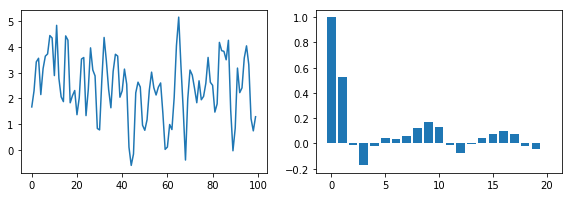

In [1]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa import stattools

const = 2 # parameter
phi = 0.6, -0.4 # parameter
sample = 102 # sample
np.random.seed(seed=9984) #seed
mean , variance = 0, 1 # normdist params
plt.figure(figsize=(15,3)) # graph size

epsilon = np.array(np.random.normal(mean, variance, sample)) # 正規ホワイトノイズ

def create_ar2(c, p, e):
    y = np.zeros(len(e))    
    for t in range(2, len(e)):
        y[t] = c + p[0] * y[t-1] + p[1] * y[t-2]+ e[t] # epsilonによってyが決定する
    return y

# 系列データ
plt.subplot(1,3,1)
y = create_ar2(const,phi,epsilon)
plt.plot(y[2:])
# ACF
plt.subplot(1,3,2)
acf = stattools.acf(y[2:],nlags=20)
plt.bar(range(len(acf)),acf)